In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.getcwd())
os.chdir('C:/Users/Cheng/OneDrive/Documents/Proj/VarianceArithemtic/Java/docs')
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb
C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\Java\docs


In [3]:
df = pd.read_csv("../output/LogVar.txt", sep='\t')
df.head()

,NoiseType,Noise,X,log,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6,4.8,5.0
0,Gaussian,0.2,0.20,-1.609440,2.039890e-135,-1.774030e-134,3.324490e-135,0.936658,4.591720e+134,-0.037067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Gaussian,0.2,0.25,-1.386290,3.614200e-116,-3.996760e-115,5.626780e-116,0.871160,2.410380e+115,-0.103975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Gaussian,0.2,0.35,-1.049820,3.532430e-87,-3.316140e-86,5.386050e-87,0.733153,2.075490e+86,-0.138797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Gaussian,0.2,0.50,-0.693147,1.531050e-56,-1.507470e-55,2.657040e-56,0.514189,3.358410e+55,-0.098585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Gaussian,0.2,0.75,-0.287682,7.377140e-22,-7.118250e-21,1.679250e-21,0.295758,4.009110e+20,-0.041624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
sorted(df['Noise'].unique())

[0.01, 0.02, 0.05, 0.1, 0.2]

# Deviation vs Uncertainty

In [5]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=sorted(df['Noise'].unique()), noiseType='Uniform',
                sStyle=['x', '-', '--', '+'], sColor = ['r','g','b','y','c','m'],
                logx=True, logy=True, xlim=[], ylim=[]):
    fig, ax = plt.subplots()
    if logx:
        ax.set_xscale('log')
    if logy:
        ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    ax.set_title('log(x +/- noise)')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}')
    ax.legend(bbox_to_anchor=(1.1, 1.05))

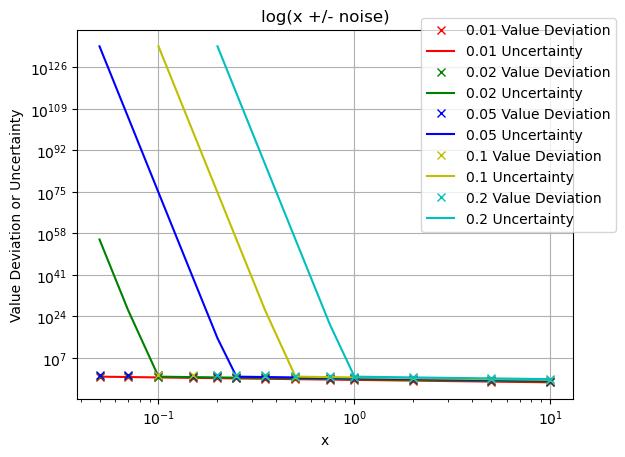

In [6]:
PlotValues()

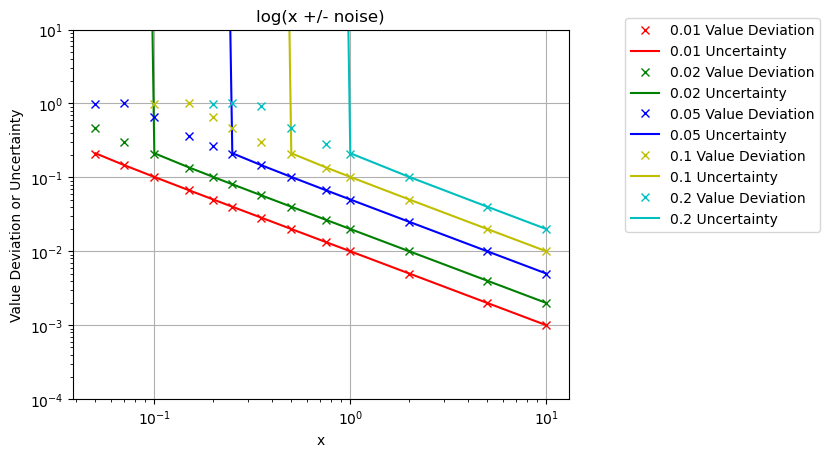

In [7]:
PlotValues(ylim=[1e-4, 1e1])

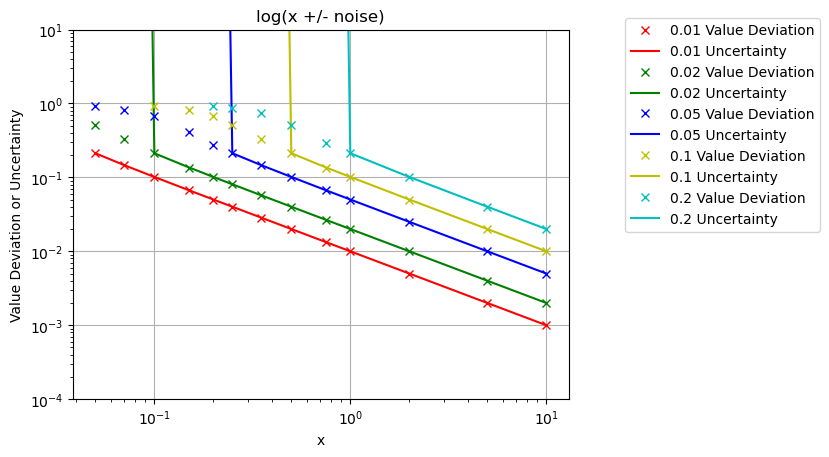

In [8]:
PlotValues(ylim=[1e-4, 1e1], noiseType='Gaussian')

In [9]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sorted(df['Noise'].unique()),
                  sColor = ['r','g','b','y','c','m'] ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$\log(x \pm \delta x)$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_xscale('log')
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.set_ylim([1e-4, 1e1])
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_xscale('log')
    ax2.set_ylabel('Error Deviation')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.55, 1.0))
    ax2.legend(bbox_to_anchor=(1.57, 0.3))

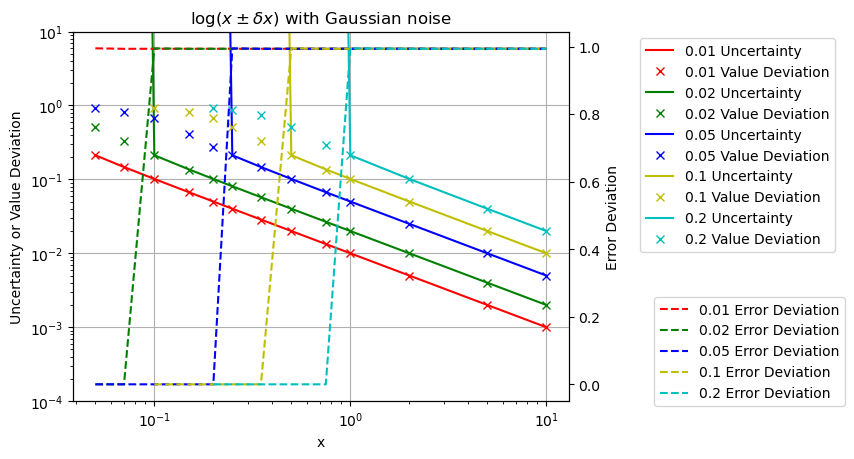

In [10]:
PlotErrorDev()

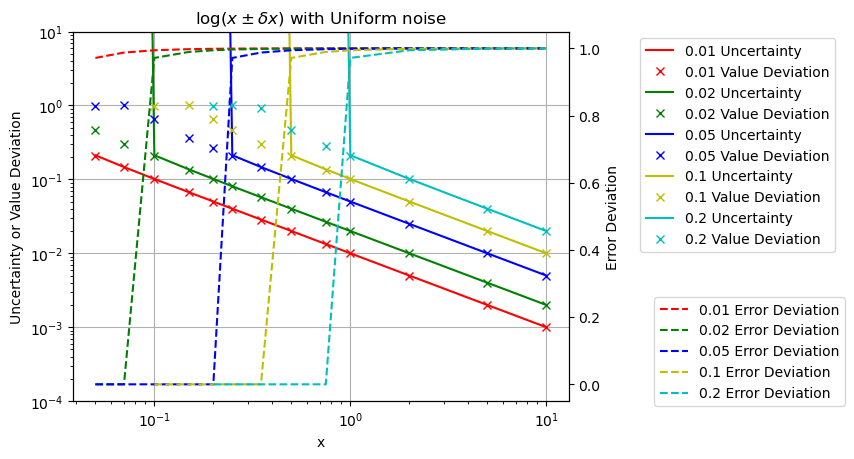

In [11]:
PlotErrorDev('Uniform')

# Mean vs Bias 

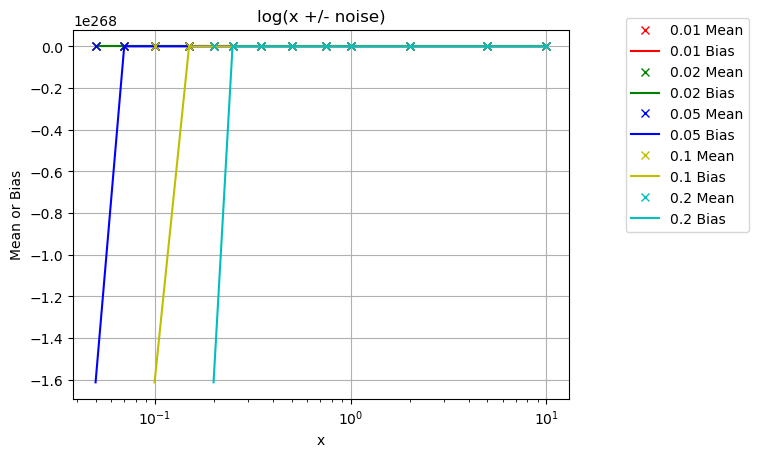

In [12]:
PlotValues(sValue=['Mean', 'Bias'], sStyle=['x', '-'], logy=False)

# Error Maximum and Minimum

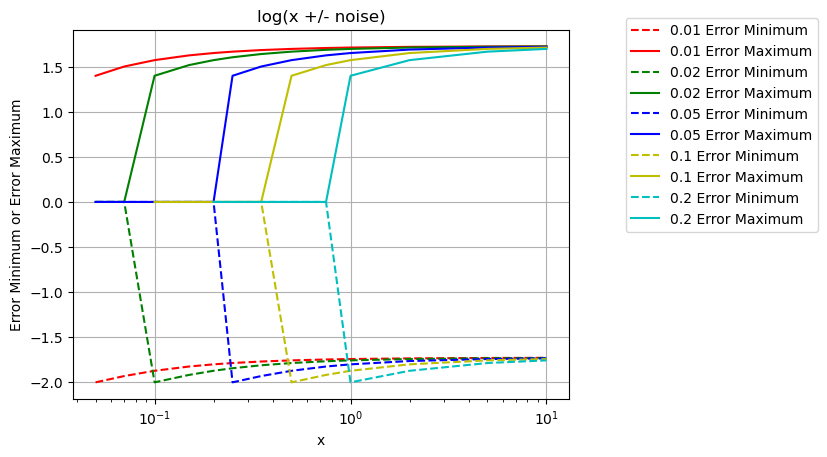

In [13]:
PlotValues(sValue=['Error Minimum', 'Error Maximum'], sStyle=['--', '-'], logy=False)

# Histogram

In [14]:
sHisto = [str(i/10) for i in range(-30, 32, 2)]
df[sHisto].head()

,-3.0,-2.8,-2.6,-2.4,-2.2,-2.0,-1.8,-1.6,-1.4,-1.2,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.003110,0.005025,0.004546,0.007776,0.006460,0.009451,0.009571,0.014236,0.017107,0.020577,...,0.037684,0.013279,0.001555,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0
1,0.003372,0.002922,0.004383,0.005507,0.009440,0.009553,0.011463,0.013261,0.018544,0.020791,...,0.036637,0.012812,0.001573,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0
2,0.003242,0.003974,0.003242,0.007006,0.006902,0.008052,0.010980,0.012025,0.016313,0.020809,...,0.033671,0.013385,0.001673,0.000105,0.000000,0.000000,0.0000,0.0,0.0,0.0
3,0.003026,0.003632,0.004741,0.005952,0.006961,0.007162,0.012105,0.013921,0.017351,0.022092,...,0.037627,0.019974,0.006961,0.001211,0.000101,0.000000,0.0000,0.0,0.0,0.0
4,0.002402,0.003003,0.004304,0.007107,0.009209,0.010310,0.013513,0.018418,0.022022,0.027628,...,0.046546,0.027027,0.017718,0.009209,0.004104,0.001101,0.0002,0.0,0.0,0.0


In [15]:
def PlotHisto( sNoiseType=['Uniform'], sNoise=df['Noise'].unique(), sX=df['X'].unique() ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot()
    ax.legend(bbox_to_anchor=(1.1, 1.05))    


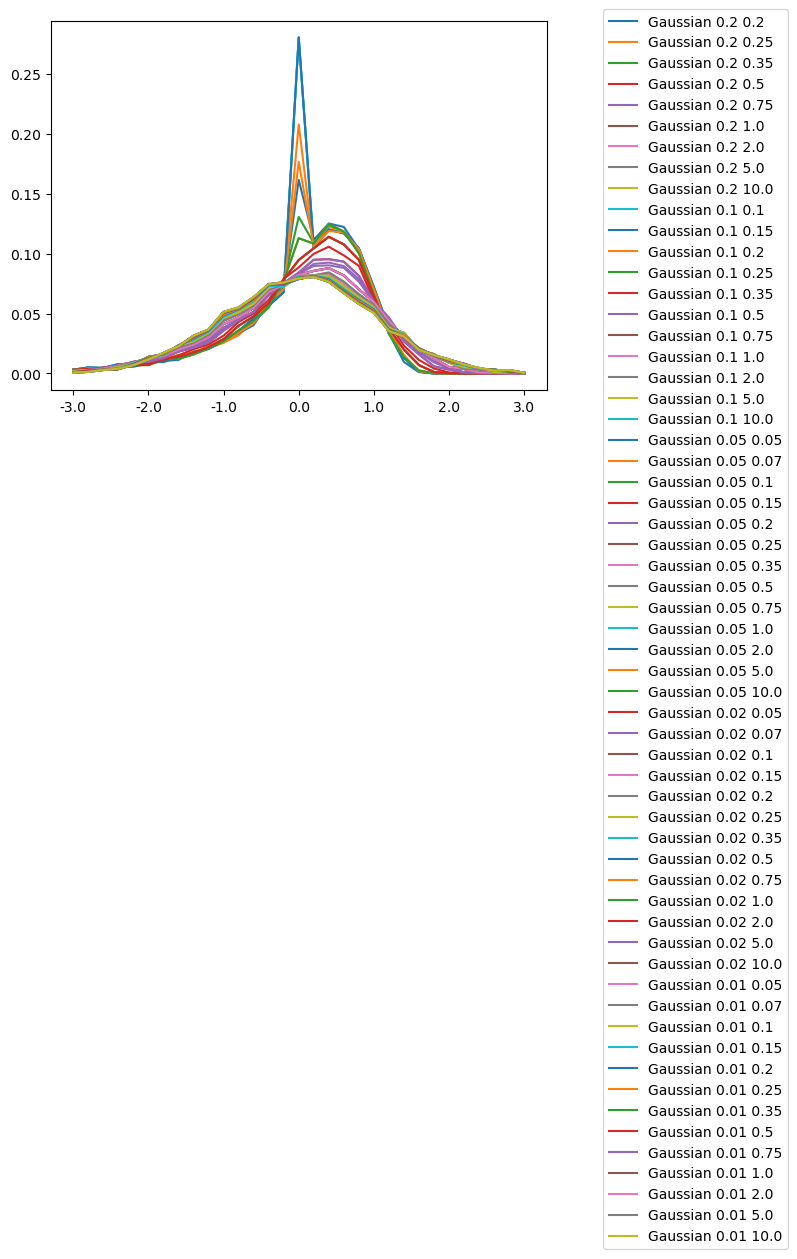

In [16]:
PlotHisto(sNoiseType=['Gaussian'])

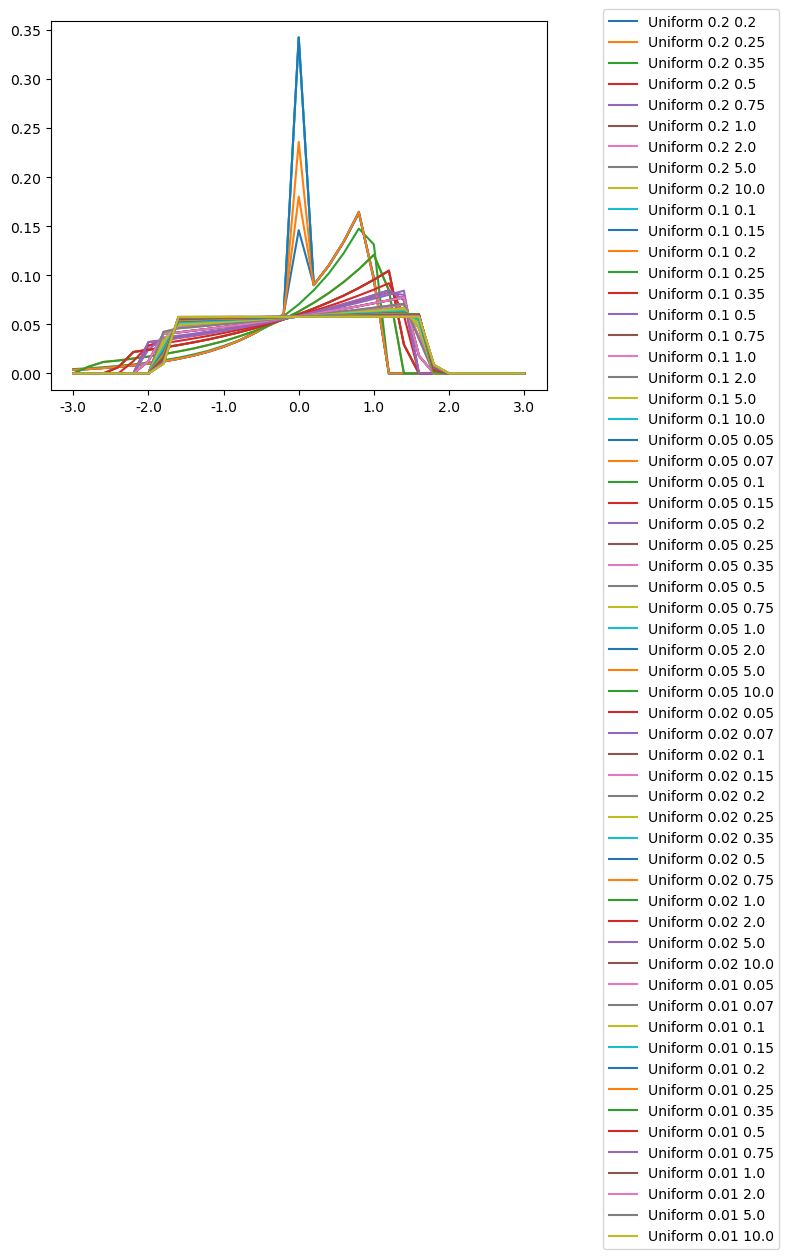

In [17]:
PlotHisto()

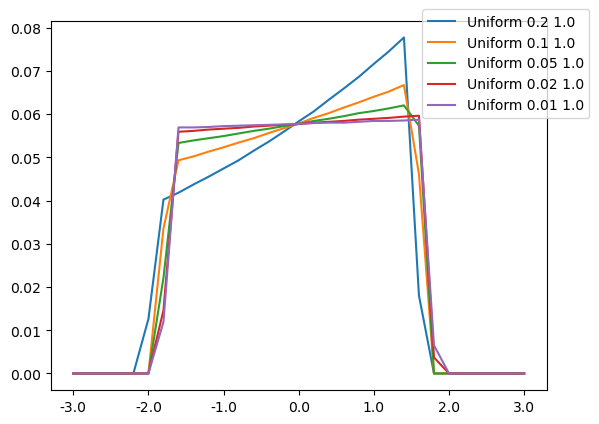

In [18]:
PlotHisto(sX=[1])

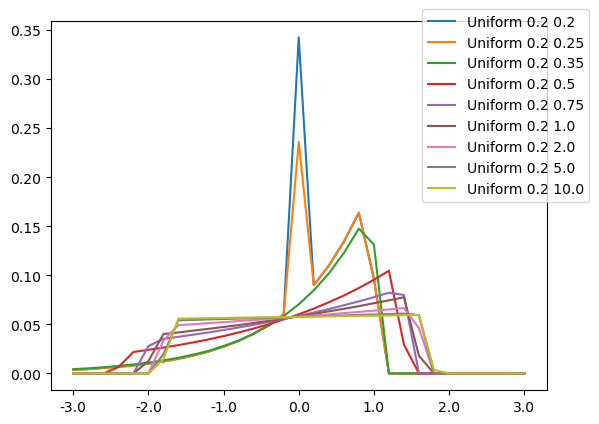

In [19]:
PlotHisto(sNoise=[0.2])

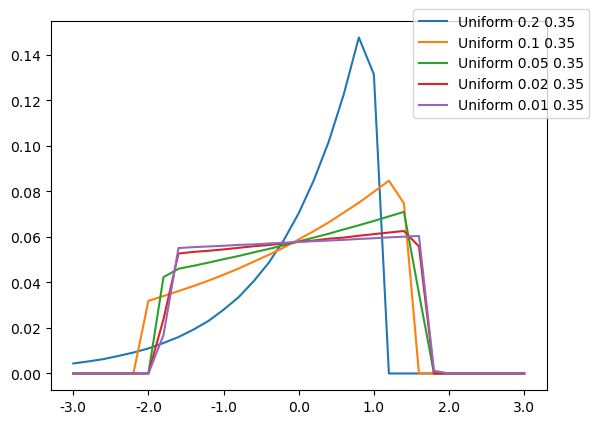

In [20]:
PlotHisto(sX=[0.35])